##### PROBLEM STATEMENT
* Fertilisers are formulations which may contain nitrogen, phosphorus and potassium compounds to promote plant growth. Fertilisers that supply all three elements are often called NPK fertilisers, after the chemical symbols for these three elements.
* System is designed to be used by farmers for suggestion of fertilizers to be used based on a set of soil features e.g. soil moisture, Ca, Potassium, soil pH etc. The prediction model is supposed to be a cloud based system accessed by farmers.
* Farmers will give soil features as input and the model will provide fertilizer predictions.

### Fertilizer Prediction

* Attributes Description

Attribute | Description
--------------|-----------
Temperature | Temperature in degree Celsius
Humidity    | Relative humidity in %
Moisture    | Ratio of the mass of water
Soil Type   | Types of Soils
Crop Type   | Type of Crops
Nitrogen    | Amount(%) of Nitrogen in Soil 
Potassium   | Amount(%) of Potassium in Soil
Phosphorous | Amount(%) of Phosphorous in Soil
Fertilizer Name | Various types of Fertilizers used for different types of Soils & Crops


STEPS TO CREATE A MODEL<br>
1.collecting the data<br>
2.Preprocessing the data<br>
3.Visualization<br>
4.Filtering the data<br>
5.Splitting the dataset(training and testing data)<br>
6.Predicting the data<br>

## Import all necessary libraries

In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.Inporting Data

In [42]:
# reading the data
df=pd.read_csv("FertilizerPrediction.csv")
df

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10.26.26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [43]:
df.head()
#it gives the top records of our data 
# in the braces we may provide how many number of records we want

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [44]:
df.tail()
# It gives the ending records of our dataset
# in the braces we may provide how many number of records we want

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10.26.26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [45]:
df.shape
#it gives the shape of the dataset
#i.e. how many number of rows and columns 

(99, 9)

In [46]:
df.size
#it gives the size of dataset
#i.e. how many values present in the entire dataset

891

In [47]:
df.describe()
# it gives the total description of dataset
#i.e. Statistical info

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [48]:
df.info()
#it gives the all the information about the dataset
#i.e. Datatypes of Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Temparature     99 non-null     int64 
 1   Humidity        99 non-null     int64 
 2   Moisture        99 non-null     int64 
 3   SoilType        99 non-null     object
 4   CropType        99 non-null     object
 5   Nitrogen        99 non-null     int64 
 6   Potassium       99 non-null     int64 
 7   Phosphorous     99 non-null     int64 
 8   FertilizerName  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [49]:
#check the unique values in dataset
df.apply(lambda x: len(x.unique()))

Temparature       14
Humidity          13
Moisture          41
SoilType           5
CropType          11
Nitrogen          24
Potassium         13
Phosphorous       32
FertilizerName     7
dtype: int64

In [50]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['SoilType', 'CropType', 'FertilizerName']

In [51]:

# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

SoilType
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: SoilType, dtype: int64

CropType
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: CropType, dtype: int64

FertilizerName
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10.26.26     7
Name: FertilizerName, dtype: int64



In [52]:
#print the all column names
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'SoilType', 'CropType',
       'Nitrogen', 'Potassium', 'Phosphorous', 'FertilizerName'],
      dtype='object')

In [53]:
#print data type of the columns
df.dtypes

Temparature        int64
Humidity           int64
Moisture           int64
SoilType          object
CropType          object
Nitrogen           int64
Potassium          int64
Phosphorous        int64
FertilizerName    object
dtype: object

## 2. cleaning and preparing the data

HANDLING MISSING VALUES

There is 6 methos for handling missing values.They are:<br>
1.df.isnull()      :- return true if the value is missing <br> 
2.df.notnull()     :- return true for non-missing values<br>
3.df.isnull().sum():- gives the count of missing values in every column 
4.df.dropna()      :- drop missing observations<br>
5.df.fillna()      :- fill missing observations<br>
6.df.replace(to_replace=np.nan.value="any value"):-replace a missing value

In [54]:
df.isnull()
# return true if the value is missing

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In the above example:<br>
False represent not null value<br>
True represent null value

In [55]:
df.notnull()
# return true for non-missing values

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
94,True,True,True,True,True,True,True,True,True
95,True,True,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True,True,True
97,True,True,True,True,True,True,True,True,True


In [56]:
df.isnull().sum()
#gives summ of all the null values present in the every column

Temparature       0
Humidity          0
Moisture          0
SoilType          0
CropType          0
Nitrogen          0
Potassium         0
Phosphorous       0
FertilizerName    0
dtype: int64

#### Methods for droping null values present in column:<br>
* df.dropna():-gives the non-null values and delete all rows which contain null values<br>
* df.dropna(how="all"):-If all values in the row are null then it will delete the row<br>
* df.dropna(how="any"):-If any one of the value in the row is null then delete the row<br>
* df.dropna(how="all",axis=1):-If the column contain all the null values then delete the column<br>
* df.dropna(how="any",axis=1):-If any value in the column is null then delete entire column<br>
* df.dropna(thresh=5):-If the row contains null values grater than or equal to 5  

#### Methods filling null values:
*df.fillna(value=0):- Fill the missing value cell with the value 0<br>
*df.fillna(values="any value we want"):-Fill the missing value cell with userdefined value<br>
*df.fillna(method="pad"):-fill with the previous row values<br>
*df.fillna(method="bfill"):-fill with the next row values<br>
*df.fillna(method="pad",axis=1):-fill with previous coulmn values<br>
*df.fillna(method="bfill",axis=1):-fill with next column values <br>
*df.fillna(value=df[coulmn].mean()):-fill with the specific coulmn mean values<br>
*df.fillna(value=df[column].max()):fill with the max value in a specified column<br>
*df.fillna(value=df[column].min()):fill with the min value of a specified column<br>
*df.fillna(value=df[column].sum()):fill with the sum of a specified coulmn    
    

#### Replacing the missing value with any value 
df.replace(to_replace=np.nan.value="any value"):-replace a missing value

######  **In this dataset there is no null values present in it so we didn't perform above preprocessing steps

## 3.Farmating the data using Label Encoder


In [57]:
# importing label encoder for converting categorical 
from sklearn.preprocessing import LabelEncoder

In [58]:

#encoding Soil Type variable
encode_soil = LabelEncoder()
df['SoilType'] = encode_soil.fit_transform(df['SoilType'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [59]:
# encoding the crop type variables
encode_crop =  LabelEncoder()
df['CropType'] = encode_crop.fit_transform(df['CropType'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [60]:

# encoding fertilizer name type variable
encode_ferti = LabelEncoder()
df['FertilizerName'] = encode_ferti.fit_transform(df['FertilizerName'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10.26.26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


## After preprocessing the data


In [61]:
df

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


## 4.Visualization

<AxesSubplot:xlabel='SoilType', ylabel='count'>

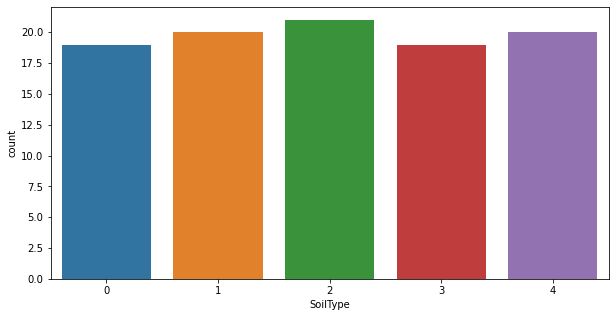

In [62]:
# it shows the count of each soil type 
plt.figure(figsize=(10,5))
sns.countplot(x='SoilType', data = df)

<AxesSubplot:xlabel='CropType', ylabel='count'>

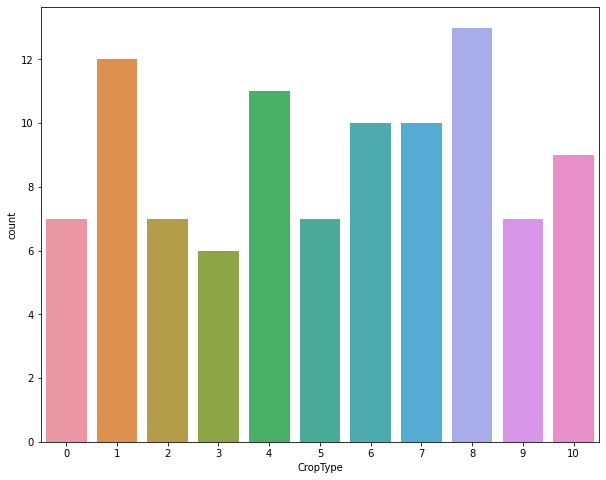

In [63]:
#it show the count of each crop type
plt.figure(figsize=(10,8))
sns.countplot(x='CropType', data = df)

<AxesSubplot:xlabel='FertilizerName', ylabel='count'>

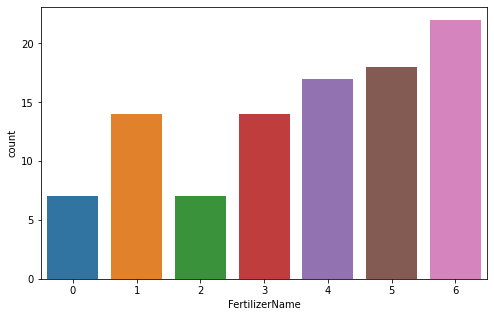

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='FertilizerName', data = df)

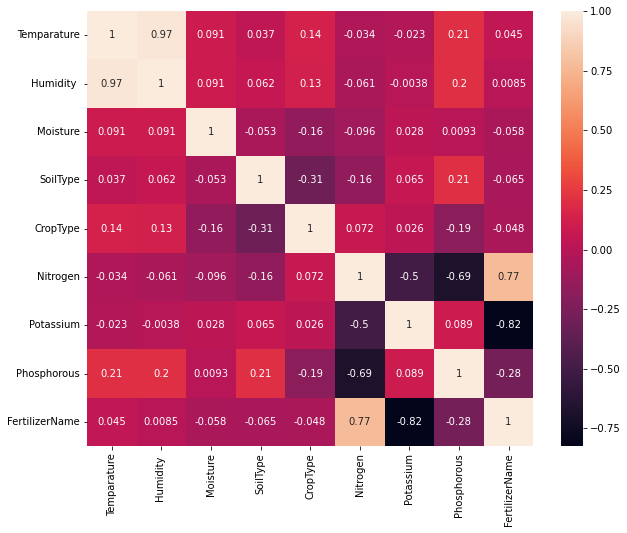

In [65]:
#correlation heatmap
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

## 5.Model Development

In [66]:
#importing train_test_split to create validation test
from sklearn.model_selection import train_test_split

In [67]:
x=df.drop(["FertilizerName"],axis=1)
y=df["FertilizerName"]

In [68]:
#split the dataset into trainset and testset
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

In [69]:
#printing the x_train
print("shape of x_train:",x_train.shape)
x_train

shape of x_train: (79, 8)


,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous
94,25,50,32,1,7,24,0,19
70,26,52,39,1,7,21,0,23
50,34,65,31,3,9,23,0,21
44,35,67,42,4,0,10,0,35
76,30,60,47,4,3,22,0,21
...,...,...,...,...,...,...,...,...
89,29,58,61,2,1,11,0,38
28,37,70,32,0,5,12,0,39
64,27,53,35,0,5,37,0,0
15,31,62,49,0,8,10,13,14


In [70]:
#test printing
print("size of x_test:",x_test.shape)
x_test

size of x_test: (20, 8)


,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous
19,29,58,52,2,10,13,0,36
14,26,52,31,3,2,14,0,41
43,34,65,60,0,8,35,0,0
37,37,70,37,1,6,12,0,41
66,34,65,57,0,8,9,0,13
3,32,62,34,3,9,22,0,20
80,28,54,43,1,6,10,8,29
41,30,60,58,2,8,10,7,32
38,25,50,26,3,2,15,14,11
68,25,50,40,1,7,6,19,16


In [71]:
#printing y_train
print("shape of y_train",y_train.shape)
y_train

shape of y_train (79,)


94    4
70    4
50    4
44    5
76    4
     ..
89    5
28    5
64    6
15    2
9     1
Name: FertilizerName, Length: 79, dtype: int32

In [72]:
#printing y_test
print("shape of y_test",y_test.shape)
y_test

shape of y_test (20,)


19    5
14    5
43    6
37    5
66    3
3     4
80    1
41    1
38    2
68    0
2     1
1     5
60    6
53    5
88    0
74    5
91    0
26    1
59    5
46    3
Name: FertilizerName, dtype: int32

## KNN Classification

In [73]:
# Feature Scaling
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [74]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [75]:
#evaluating KNN for Classification
acc=classifier.score(x_test,y_test)
print("Accuracy of testing set knn:",acc)

Accuracy of testing set knn: 0.8


In [76]:
#evaluating KNN for Classification
acc=classifier.score(x_train,y_train)
print("Accuracy of training set knn:",acc)

Accuracy of training set knn: 0.9493670886075949


In [77]:
# Calculating the Accuracy
from sklearn import metrics
y_pred=classifier.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8


In [78]:
#classification report
from sklearn.metrics import classification_report
print("Classification report of KNN classifier:\n",classification_report (y_test,y_pred))

Classification report of KNN classifier:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       0.88      1.00      0.93         7
           6       1.00      1.00      1.00         2

    accuracy                           0.80        20
   macro avg       0.71      0.73      0.71        20
weighted avg       0.75      0.80      0.77        20



In [79]:

a=float(input("enter temparature value:"))
b=float(input("enter Humidity value:"))
c=float(input("enter Moisture value:"))
d=int(input("enter soil type value:"))
e=int(input("enter Crop type value:"))
f=float(input("enter Nitrogen value:"))
g=float(input("enter Potassium value:"))
h=float(input("enter Phoshporous value:"))
ans=classifier.predict([[a,b,c,d,e,f,g,h]])
if(((a>=20)&(a<=40)) & ((b>40)&(b<70)) & ((c>=20)&(c<=70)) & ((d>=0)&(d<=4)) & ((e>=0)&(e<=10)) & ((f>=0)&(f<=50)) & ((g>=0)&(g<=20)) & 
    ((h>=0)&(h<=50))):
    if ans[0] == 0:
        print("10-26-26")
    elif ans[0] ==1:
        print("14-35-14")
    elif ans[0] == 2:
        print("17-17-17")
    elif ans[0] == 3:
        print("20-20")
    elif ans[0] == 4:
        print("28-28")
    elif ans[0]==5:
        print("DAP")
    elif ans[0]==6:
        print("Urea")
else:
    print("invalid input")
    

enter temparature value:30
enter Humidity value:50
enter Moisture value:30
enter soil type value:3
enter Crop type value:3
enter Nitrogen value:30
enter Potassium value:10
enter Phoshporous value:30
28-28


## Decision Tree

In [80]:
#importing libraries
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
print("score of traing set:",clf.score(x_train,y_train))
print("score of testing set:",clf.score(x_test,y_test))

score of traing set: 1.0
score of testing set: 1.0


In [82]:
y_pred=clf.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 1.0


In [83]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Prediction Report

In [85]:
a=float(input("enter temparature value:"))
b=float(input("enter Humidity value:"))
c=float(input("enter Moisture value:"))
d=int(input("enter soil type value:"))
e=int(input("enter Crop type value:"))
f=float(input("enter Nitrogen value:"))
g=float(input("enter Potassium value:"))
h=float(input("enter Phoshporous value:"))
ans=clf.predict([[a,b,c,d,e,f,g,h]])
if(((a>=20)&(a<=40)) & ((b>40)&(b<70)) & ((c>=20)&(c<=70)) & ((d>=0)&(d<=4)) & ((e>=0)&(e<=11)) & ((f>=0)&(f<=50)) & ((g>=0)&(g<=20)) & 
   ((h>=0)&(h<=50))):
    if ans[0] == 0:
        print("10-26-26")
    elif ans[0] ==1:
        print("14-35-14")
    elif ans[0] == 2:
        print("17-17-17")
    elif ans[0] == 3:
        print("20-20")
    elif ans[0] == 4:
        print("28-28")
    elif ans[0]==5:
        print("DAP")
    else:
        print("Urea")
else:
    print("Input value is in valid")

enter temparature value:30
enter Humidity value:50
enter Moisture value:30
enter soil type value:3
enter Crop type value:3
enter Nitrogen value:30
enter Potassium value:10
enter Phoshporous value:30
28-28
